In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import csv

#Spaghetti-code

subfolders = []
for a in range(1,7):
    subfolders.append('+1e-0'+str(a)+'_+1e-04')


DATA_FOLDER = '/content/gdrive/My Drive/101/results/logreg/'

results_sgd = {}
results_sgd_hd = {}

for i in range(6):
    file_sgd = DATA_FOLDER + subfolders[i] + '/sgd.csv'
    sgd = np.zeros((3,51))
    with open(file_sgd, 'r') as f:
        df = pd.read_csv(f)
        sgd[0,:] = df['AlphaEpoch'][df['AlphaEpoch'].notna()].values
        sgd[1,:] = df['LossEpoch'][df['LossEpoch'].notna()].values
        sgd[2,:] = df['ValidLossEpoch'][df['ValidLossEpoch'].notna()].values
        results_sgd[subfolders[i]] = sgd
    
    file_sgd = DATA_FOLDER + subfolders[i] + '/sgd_hd.csv'
    sgd_hd = np.zeros((3,51))
    with open(file_sgd, 'r') as f:
        df = pd.read_csv(f)
        sgd_hd[0,:] = df['AlphaEpoch'][df['AlphaEpoch'].notna()].values
        sgd_hd[1,:] = df['LossEpoch'][df['LossEpoch'].notna()].values
        sgd_hd[2,:] = df['ValidLossEpoch'][df['ValidLossEpoch'].notna()].values
        results_sgd_hd[subfolders[i]] = sgd_hd 
        

In [0]:
subfolders = []
DATA_FOLDER = '/content/gdrive/My Drive/101/results 102/logreg/'
for a in range(1,7):
    subfolders.append('+1e-0'+str(a)+'_+1e-04_+1e-03')
 

results_sgd_2hd = {}
for i in range(6):
    file_sgd = DATA_FOLDER + subfolders[i] + '/sgd_hd.csv'
    sgd_hd = np.zeros((3,51))
    with open(file_sgd, 'r') as f:
        df = pd.read_csv(f)
        sgd_hd[0,:] = df['AlphaEpoch'][df['AlphaEpoch'].notna()].values
        sgd_hd[1,:] = df['LossEpoch'][df['LossEpoch'].notna()].values
        sgd_hd[2,:] = df['ValidLossEpoch'][df['ValidLossEpoch'].notna()].values
        results_sgd_2hd[subfolders[i]] = sgd_hd

<Figure size 504x1152 with 0 Axes>

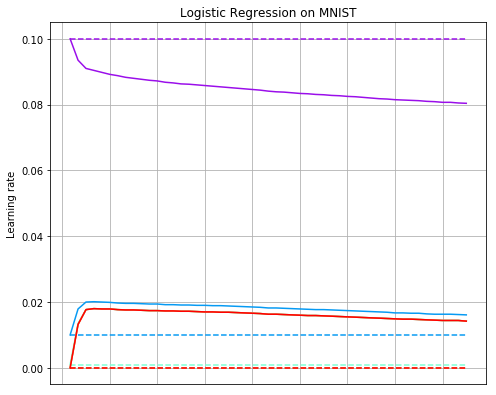

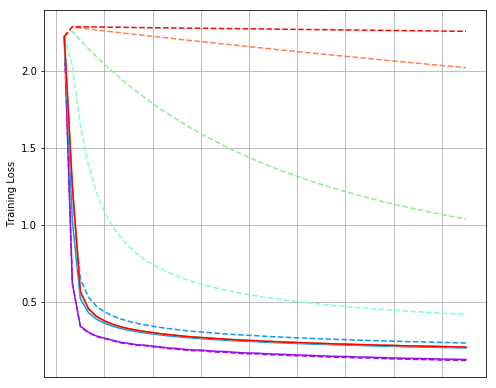

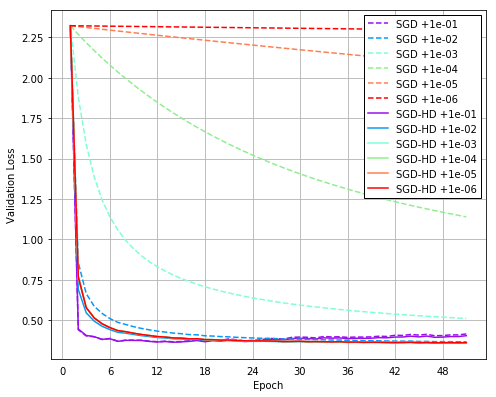

In [0]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

colors = ['xkcd:violet', 'xkcd:azure', 'aquamarine', 'lightgreen', 'coral', 'red']
plt.figure(figsize=(7,16))

fig = plt.figure(figsize=(7,16))
ax = fig.add_subplot(311)
for i, name in enumerate(list(results_sgd.keys())):
    plt.plot(np.linspace(1,51,51), results_sgd[name][0], label='SGD ' + name.split('_+')[0], color=colors[i], linestyle='--')
    plt.plot(np.linspace(1,51,51), results_sgd_hd[name][0], label='SGD-HD ' + name.split('_+')[0], color=colors[i], linestyle='-')
    
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Learning rate')
plt.tick_params(labeltop=False, labelbottom=False, bottom=False, top=False, labelright=False)
plt.grid()
plt.title('Logistic Regression on MNIST')
plt.tight_layout()
plt.show()


fig = plt.figure(figsize=(7,16))
ax = fig.add_subplot(312)
for i, name in enumerate(list(results_sgd.keys())):
    plt.plot(np.linspace(1,51,51), results_sgd[name][1], label='SGD ' + name.split('_+')[0], color=colors[i], linestyle='--')
    plt.plot(np.linspace(1,51,51), results_sgd_hd[name][1], label='SGD-HD ' + name.split('_+')[0], color=colors[i], linestyle='-')
    
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Training Loss')
plt.tick_params(labeltop=False, labelbottom=False, bottom=False, top=False, labelright=False)
plt.grid()
plt.tight_layout()
plt.show()


fig = plt.figure(figsize=(7,16))
ax = fig.add_subplot(312)
for i, name in enumerate(list(results_sgd.keys())):
    plt.plot(np.linspace(1,51,51), results_sgd[name][2], label='SGD ' + name.split('_+')[0], color=colors[i], linestyle='--')
    plt.plot(np.linspace(1,51,51), results_sgd_hd[name][2], label='SGD-HD ' + name.split('_+')[0], color=colors[i], linestyle='-')
    
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.tick_params(labeltop=False, labelbottom=True, bottom=False, top=False, labelright=False)
handles, labels = plt.gca().get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
plt.legend(handles, labels, loc='upper right',frameon=1,framealpha=1,edgecolor='black',fancybox=False)
plt.grid()
plt.tight_layout()
plt.show()

<Figure size 504x1152 with 0 Axes>

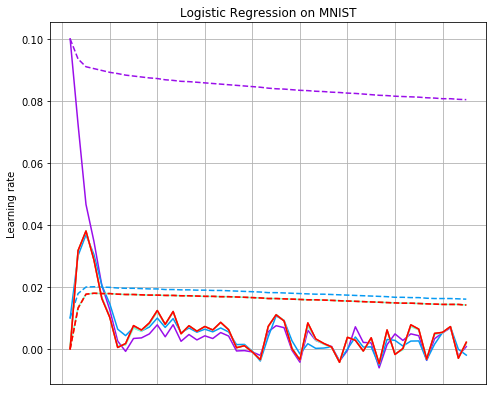

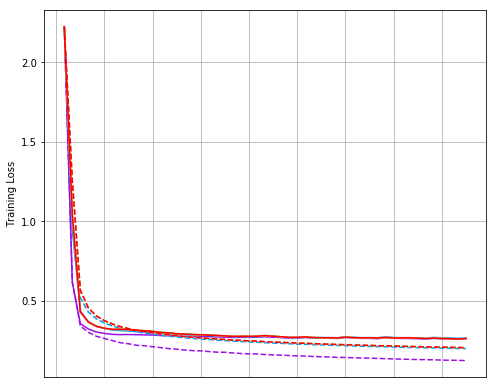

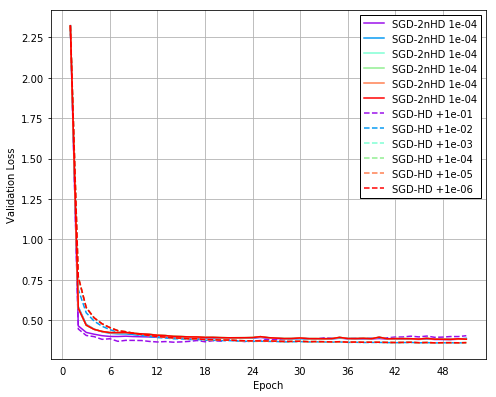

In [0]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

colors = ['xkcd:violet', 'xkcd:azure', 'aquamarine', 'lightgreen', 'coral', 'red']
plt.figure(figsize=(7,16))

fig = plt.figure(figsize=(7,16))
ax = fig.add_subplot(311)
for i, name in enumerate(list(results_sgd.keys())):
    name2 = name + '_+1e-03'
    plt.plot(np.linspace(1,51,51), results_sgd_hd[name][0], label='SGD-HD ' + name.split('_+')[0], color=colors[i], linestyle='--')
    plt.plot(np.linspace(1,51,51), results_sgd_2hd[name2][0], label='SGD-2nHD ' + name2.split('_+')[1], color=colors[i], linestyle='-')
    
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Learning rate')
plt.tick_params(labeltop=False, labelbottom=False, bottom=False, top=False, labelright=False)
plt.grid()
plt.title('Logistic Regression on MNIST')
plt.tight_layout()
plt.show()


fig = plt.figure(figsize=(7,16))
ax = fig.add_subplot(312)
for i, name in enumerate(list(results_sgd.keys())):
    name2 = name + '_+1e-03'
    plt.plot(np.linspace(1,51,51), results_sgd_hd[name][1], label='SGD-HD ' + name.split('_+')[0], color=colors[i], linestyle='--')
    plt.plot(np.linspace(1,51,51), results_sgd_2hd[name2][1], label='SGD-2nHD ' + name2.split('_+')[1], color=colors[i], linestyle='-')
    
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Training Loss')
plt.tick_params(labeltop=False, labelbottom=False, bottom=False, top=False, labelright=False)
plt.grid()
plt.tight_layout()
plt.show()


fig = plt.figure(figsize=(7,16))
ax = fig.add_subplot(312)
for i, name in enumerate(list(results_sgd.keys())):
    name2 = name + '_+1e-03'
    plt.plot(np.linspace(1,51,51), results_sgd_hd[name][2], label='SGD-HD ' + name.split('_+')[0], color=colors[i], linestyle='--')
    plt.plot(np.linspace(1,51,51), results_sgd_2hd[name2][2], label='SGD-2nHD ' + name2.split('_+')[1], color=colors[i], linestyle='-')
    
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.tick_params(labeltop=False, labelbottom=True, bottom=False, top=False, labelright=False)
handles, labels = plt.gca().get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
plt.legend(handles, labels, loc='upper right',frameon=1,framealpha=1,edgecolor='black',fancybox=False)
plt.grid()
plt.tight_layout()
plt.show()

In [0]:
import pandas as pd
import numpy as np
import csv


subfolders = []
for a in range(1,7):
    subfolders.append('+1e-0'+str(a)+'_+1e-04')


DATA_FOLDER = '/content/gdrive/My Drive/101/results/logreg/'

results_adam= {}
results_adam_hd = {}

for i in range(6):
    file_sgd = DATA_FOLDER + subfolders[i] + '/adam.csv'
    adam = np.zeros((3,51))
    with open(file_sgd, 'r') as f:
        df = pd.read_csv(f)
        adam[0,:] = df['AlphaEpoch'][df['AlphaEpoch'].notna()].values
        adam[1,:] = df['LossEpoch'][df['LossEpoch'].notna()].values
        adam[2,:] = df['ValidLossEpoch'][df['ValidLossEpoch'].notna()].values
        results_sgd[subfolders[i]] = adam
    
    file_sgd = DATA_FOLDER + subfolders[i] + '/adam_hd.csv'
    adam_hd = np.zeros((3,51))
    with open(file_sgd, 'r') as f:
        df = pd.read_csv(f)
        adam_hd[0,:] = df['AlphaEpoch'][df['AlphaEpoch'].notna()].values
        adam_hd[1,:] = df['LossEpoch'][df['LossEpoch'].notna()].values
        adam_hd[2,:] = df['ValidLossEpoch'][df['ValidLossEpoch'].notna()].values
        results_sgd_hd[subfolders[i]] = adam_hd 

<Figure size 504x1152 with 0 Axes>

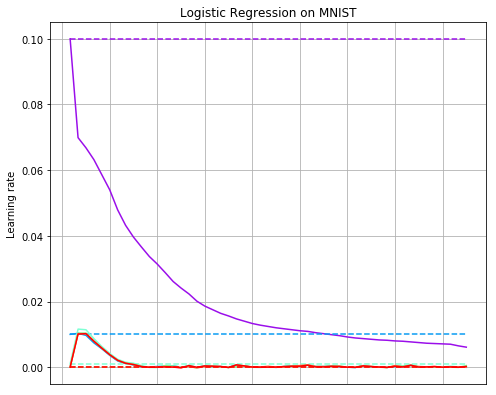

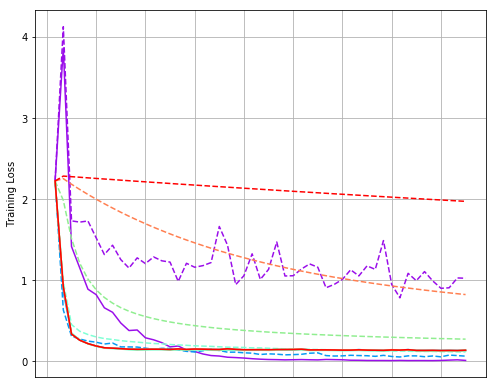

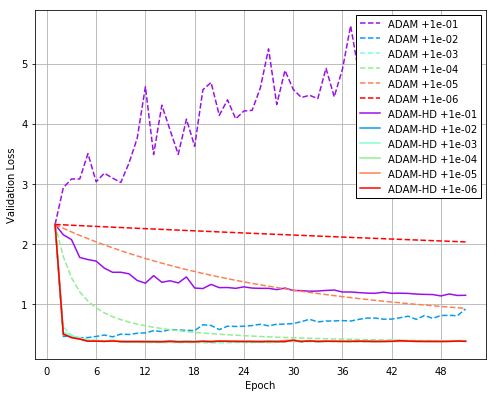

In [0]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

colors = ['xkcd:violet', 'xkcd:azure', 'aquamarine', 'lightgreen', 'coral', 'red']
plt.figure(figsize=(7,16))

fig = plt.figure(figsize=(7,16))
ax = fig.add_subplot(311)
for i, name in enumerate(list(results_sgd.keys())):
    plt.plot(np.linspace(1,51,51), results_sgd[name][0], label='ADAM ' + name.split('_+')[0], color=colors[i], linestyle='--')
    plt.plot(np.linspace(1,51,51), results_sgd_hd[name][0], label='ADAM-HD ' + name.split('_+')[0], color=colors[i], linestyle='-')
    
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Learning rate')
plt.tick_params(labeltop=False, labelbottom=False, bottom=False, top=False, labelright=False)
plt.grid()
plt.title('Logistic Regression on MNIST')
plt.tight_layout()
plt.show()


fig = plt.figure(figsize=(7,16))
ax = fig.add_subplot(312)
for i, name in enumerate(list(results_sgd.keys())):
    plt.plot(np.linspace(1,51,51), results_sgd[name][1], label='ADAM ' + name.split('_+')[0], color=colors[i], linestyle='--')
    plt.plot(np.linspace(1,51,51), results_sgd_hd[name][1], label='ADAM-HD ' + name.split('_+')[0], color=colors[i], linestyle='-')
    
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Training Loss')
plt.tick_params(labeltop=False, labelbottom=False, bottom=False, top=False, labelright=False)
plt.grid()
plt.tight_layout()
plt.show()


fig = plt.figure(figsize=(7,16))
ax = fig.add_subplot(312)
for i, name in enumerate(list(results_sgd.keys())):
    plt.plot(np.linspace(1,51,51), results_sgd[name][2], label='ADAM ' + name.split('_+')[0], color=colors[i], linestyle='--')
    plt.plot(np.linspace(1,51,51), results_sgd_hd[name][2], label='ADAM-HD ' + name.split('_+')[0], color=colors[i], linestyle='-')
    
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.tick_params(labeltop=False, labelbottom=True, bottom=False, top=False, labelright=False)
handles, labels = plt.gca().get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
plt.legend(handles, labels, loc='upper right',frameon=1,framealpha=1,edgecolor='black',fancybox=False)
plt.grid()
plt.tight_layout()
plt.show()